# import libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import sys, os
sys.path.append(os.path.realpath("/home/ms994/beat_pd2"))
import matplotlib.pyplot as plt

In [2]:
import src.main
import momo.tf_mapper as tfm

/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ms994/miniconda3/envs/keras-

# Try to review the data again

In [3]:
train_watch_accel = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_accelerometer/*.csv")
train_watch_gyro = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/*.csv")
train_phone_accel = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartphone_accelerometer/*.csv")

In [4]:
from importlib import reload
reload(src.main)
src.main.read_seq(train_watch_accel[0]).head()

,x,y,z
t,,,
0.000,1.786075,-5.382165,8.226477
0.023,1.800440,-5.262455,8.212111
0.040,1.781286,-5.439626,8.212111
0.063,1.762132,-5.453991,8.221688
0.080,1.843535,-5.530606,8.145074


In [4]:
labels = pd.concat([pd.read_csv("/home/ms994/beat_pd/data/real-pd/data_labels/REAL-PD_Training_Data_IDs_Labels.csv"),pd.read_csv("/home/ms994/beat_pd/data/real-pd/data_labels/REAL-PD_Ancillary_Data_IDs_Labels.csv")])

In [6]:
labels.on_off.value_counts()

0.0    455
1.0    234
Name: on_off, dtype: int64

In [6]:
labels.measurement_id.unique().shape

(1081,)

In [7]:
labels.shape

(1081, 5)

In [8]:
%%bash
ls /home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv

/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv


In [9]:
phone_meta = pd.read_csv("/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv")
phone_meta.head()

,subject_id,smartphone_brand,smartphone_model,android_version,Most_Common_Smartphone_Location,Smartphone_Location_Other
0,hbv002,Samsung,Note 8,7.1.1,Front pocket,NaN
1,hbv012,Samsung,Galaxy J3,5.1.1,Front pocket,NaN
2,hbv013,Samsung,S5 Neo,6.0.1,Front pocket,NaN
3,hbv014,Samsung,J5,6.0.1,Front pocket,NaN
4,hbv016,Huawei,Ascent 550,4.4,Front pocket,NaN


In [10]:
phone_meta.Most_Common_Smartphone_Location.unique()

array(['Front pocket', 'Other', 'Back pocket', 'Jacket'], dtype=object)

In [11]:
phone_meta.Smartphone_Location_Other.unique()

array([nan, 'vlakbij me',
       'elastisch heuptasje welke je ook gebruikt tijdens het sporten'],
      dtype=object)

In [12]:
demographics =  pd.read_csv("/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Demographics.csv")
demographics.head()

,subject_id,Age,Gender
0,hbv002,65,Male
1,hbv012,57,Female
2,hbv013,68,Female
3,hbv014,67,Male
4,hbv016,71,Male


In [13]:
all_device_id = {}

In [14]:
for fn in train_watch_accel:
    df = pd.read_csv(fn)
    all_device_id[fn] = df.device_id.unique()

In [15]:
dev_num = {}
for key in all_device_id.keys():
    dev_num[key] = len(all_device_id[key])

(array([394.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 141.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

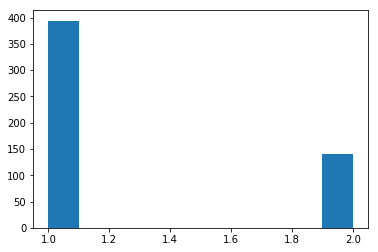

In [16]:
plt.hist(pd.Series(dev_num))

In [17]:
dev_acc_num = pd.Series(dev_num) 

In [18]:
all_device_id = {}
for fn in train_watch_gyro:
    df = pd.read_csv(fn)
    all_device_id[fn] = df.device_id.unique()
dev_num = {}
for key in all_device_id.keys():
    dev_num[key] = len(all_device_id[key])
dev_gyro_num = pd.Series(dev_num)

In [19]:
(set(dev_acc_num[dev_acc_num == 2].index) == set(dev_gyro_num[dev_gyro_num == 2].index))

False

In [20]:
set(map(lambda x: x[68:-4], dev_gyro_num.keys())) == set(map(lambda x: x[72:-4], dev_acc_num.keys()))

True

In [21]:
all_device_id

{'/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/29084e8f-4ded-4bc4-8837-b42aafd0b211.csv': array(['2WLT'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/439bc1b9-1b23-4691-a454-f4e1c7b8e4d9.csv': array(['2WH8'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/b36b10ee-94d2-47e1-bc24-59760c976e6b.csv': array(['327T'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/5b8eafee-0b7e-42ec-9cad-42b173bc5005.csv': array(['2VSP'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/1dd1609d-b818-4cc0-a1b8-1d8066332a9e.csv': array(['2VSP'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/faf50397-21ef-4f14-b203-9a6fc4ba70d2.csv': array(['327T'], dtype=object),
 '/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/7bee6251-c39e-4feb-bbd2-055ab31131b8.csv': array(['327T', '2WH3'],

# Create a new index on the device num, combining real_pd and cis_pd

In [22]:
toUse = list(map(lambda x: (x[68:-4], all_device_id[x]), list(all_device_id.keys())))

In [23]:
newLabels = []
for m_id, deviceArray in toUse:
    base = (labels[labels.measurement_id == m_id])
    for device in deviceArray:
        toAdd = base.copy()
        toAdd["device_id"] = device
        newLabels.append(toAdd)

In [24]:
newLabels = pd.concat(newLabels)

In [25]:
newLabels["smartwatch_data"]=True

In [50]:
newLabels.measurement_id.unique().shape

(535,)

In [37]:
m_id = labels.measurement_id.unique()

In [53]:
len(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_phone_accel])), len(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_watch_accel])), len(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_watch_gyro]))

(526, 535, 535)

In [40]:
gyro = list(map(lambda x: x[68:-4], train_watch_gyro))

In [55]:
newLabels.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor,device_id,smartwatch_data
339,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0,2WLT,True
88,439bc1b9-1b23-4691-a454-f4e1c7b8e4d9,hbv038,1.0,NaN,3.0,2WH8,True
534,b36b10ee-94d2-47e1-bc24-59760c976e6b,hbv022,0.0,NaN,0.0,327T,True
297,5b8eafee-0b7e-42ec-9cad-42b173bc5005,hbv077,0.0,NaN,NaN,2VSP,True
266,1dd1609d-b818-4cc0-a1b8-1d8066332a9e,hbv051,0.0,NaN,NaN,2VSP,True


In [56]:
set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_watch_accel]) == set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_watch_gyro])

True

In [60]:
len(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_watch_accel]).union(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_phone_accel])))

591

In [61]:
newLabels["gyro_data"] = True # every watch data has gyro as well

In [67]:
newLabels["smartphone_data"] = newLabels.measurement_id.isin(set([train_phone_accel_unit.split("/")[-1][:-4] for train_phone_accel_unit in train_phone_accel]))

In [73]:
newLabels = newLabels.reset_index().drop(["index"], axis=1)

In [85]:
newLabels = newLabels[((newLabels["smartwatch_data"] == True) & (newLabels["smartphone_data"] == True)) & (newLabels["gyro_data"] == True)]

In [88]:
newLabels

,measurement_id,subject_id,on_off,dyskinesia,tremor,device_id,smartwatch_data,gyro_data,smartphone_data
0,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0,2WLT,True,True,True
1,439bc1b9-1b23-4691-a454-f4e1c7b8e4d9,hbv038,1.0,NaN,3.0,2WH8,True,True,True
2,b36b10ee-94d2-47e1-bc24-59760c976e6b,hbv022,0.0,NaN,0.0,327T,True,True,True
3,5b8eafee-0b7e-42ec-9cad-42b173bc5005,hbv077,0.0,NaN,NaN,2VSP,True,True,True
4,1dd1609d-b818-4cc0-a1b8-1d8066332a9e,hbv051,0.0,NaN,NaN,2VSP,True,True,True
5,faf50397-21ef-4f14-b203-9a6fc4ba70d2,hbv022,0.0,NaN,0.0,327T,True,True,True
6,7bee6251-c39e-4feb-bbd2-055ab31131b8,hbv023,NaN,NaN,3.0,327T,True,True,True
7,7bee6251-c39e-4feb-bbd2-055ab31131b8,hbv023,NaN,NaN,3.0,2WH3,True,True,True
8,6e290268-7c1c-435a-b688-a4d7b3dfb862,hbv017,NaN,1.0,NaN,2WH7,True,True,True
9,6e290268-7c1c-435a-b688-a4d7b3dfb862,hbv017,NaN,1.0,NaN,2WH5,True,True,True


In [87]:
newLabels.to_csv("/home/ms994/beat_pd2/data/normalized-real-pd-labels.csv")

In [89]:
allLabels = newLabels

In [14]:
allLabels = pd.read_csv("/home/ms994/beat_pd2/data/normalized-real-pd-labels.csv", index_col=0)

In [90]:
allLabels.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor,device_id,smartwatch_data,gyro_data,smartphone_data
0,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0,2WLT,True,True,True
1,439bc1b9-1b23-4691-a454-f4e1c7b8e4d9,hbv038,1.0,NaN,3.0,2WH8,True,True,True
2,b36b10ee-94d2-47e1-bc24-59760c976e6b,hbv022,0.0,NaN,0.0,327T,True,True,True
3,5b8eafee-0b7e-42ec-9cad-42b173bc5005,hbv077,0.0,NaN,NaN,2VSP,True,True,True
4,1dd1609d-b818-4cc0-a1b8-1d8066332a9e,hbv051,0.0,NaN,NaN,2VSP,True,True,True


# Try to setup a data extraction pipeline into TFRecords

In [198]:
allResults[0][3]

measurement_id     11c88a48-9074-4219-a191-e51414108ddf
smartphone_data                                    True
subject_id                                       hbv012
on_off                                              NaN
dyskinesia                                          NaN
tremor                                                2
device_id                                          2WLT
smartwatch_data                                    True
gyro_data                                          True
Name: 229, dtype: object

In [91]:
all_subjects = allLabels.subject_id.unique()
all_m_id = allLabels.measurement_id.unique()

In [92]:
all_m_id = all_m_id.tolist()

In [93]:
all_subjects = all_subjects.tolist()

In [94]:
from addict import Dict

In [95]:
pd.isnull(allLabels).mean(0)

measurement_id     0.000000
subject_id         0.000000
on_off             0.448333
dyskinesia         0.580000
tremor             0.531667
device_id          0.000000
smartwatch_data    0.000000
gyro_data          0.000000
smartphone_data    0.000000
dtype: float64

In [96]:
i = 0
def get_real_pd_i(i):
    try:
        max_window=pd.Timedelta(seconds=60)
        overlap=pd.Timedelta(seconds=10)
        currentRow = allLabels.iloc[i]
        m_id = currentRow.loc["measurement_id"]
        dev_id = currentRow.loc["device_id"]
        try:
            smartWatchAccel = src.main.read_seq(f"/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_accelerometer/{m_id}.csv", dev_id, use_time_index=True, resample=pd.Timedelta(seconds=1/25))
        except:
            return []
        if currentRow["gyro_data"]:
            try:
                smartWatchGyro = src.main.read_seq(f"/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/{m_id}.csv", dev_id, use_time_index=True, resample=pd.Timedelta(seconds=1/25))
            except:
                currentRow["gyro_data"] = False
                smartWatchGyro = pd.Dataframe(index=smartWatchAccel.index, columns=['x', 'y', 'z']).fillna(0) #will pass in a mask as well

            if smartWatchGyro.index.max() >= smartWatchAccel.index.max():
                smartWatchGyro = smartWatchGyro.loc[:smartWatchAccel.index.max()]
            else:
                smartWatchAccel = smartWatchAccel.loc[:smartWatchGyro.index.max()]
        else:
            smartWatchGyro = pd.Dataframe(index=smartWatchAccel.index, columns=['x', 'y', 'z']).fillna(0) #will pass in a mask as well
        if currentRow["smartphone_data"]:
            try:
                smartphone = src.main.read_seq(f"/home/ms994/beat_pd/data/real-pd/training_data/smartphone_accelerometer/{m_id}.csv", use_time_index=True, resample=pd.Timedelta(seconds=1/25))
            except:
                smartphone = pd.Dataframe(index=smartWatchAccel.index, columns=['x', 'y', 'z']).fillna(0)
                currentRow["smartphone_data"] = False
        else:
            smartphone = pd.Dataframe(index=smartWatchAccel.index, columns=['x', 'y', 'z']).fillna(0)
        if smartphone.index.max() >= smartWatchAccel.index.max():
            smartphone = smartphone.loc[:smartWatchAccel.index.max()]
        else:
            smartWatchAccel = smartWatchAccel.loc[:smartphone.index.max()]
            smartWatchGyro = smartWatchGyro.loc[:smartphone.index.max()]
        all_samples = []
        currentIndex = pd.Timedelta(seconds=0)
        while (currentIndex + max_window < smartWatchAccel.index.max()):
            gyro = smartWatchGyro.loc[currentIndex:currentIndex+max_window].fillna(method="ffill").fillna(method="bfill").values
            accel = smartWatchAccel.loc[currentIndex:currentIndex+max_window].fillna(method="ffill").fillna(method="bfill").values
            phone = smartphone.loc[currentIndex:currentIndex+max_window].fillna(method="ffill").fillna(method="bfill").values
            all_samples.append((accel, gyro, phone, currentRow)) #some values are NaNs in the data!
            currentIndex += overlap
        return all_samples
    except:
        return []

In [97]:
get_real_pd_i(10)

[(array([[  6.6702455,  -8.147468 ,   3.3303345],
         [  6.526594 ,  -7.714118 ,   3.5170825],
         [  6.4380085,  -8.5784245,   2.9879635],
         ...,
         [  1.2569555,  -8.90643  ,   3.347094 ],
         [  1.493982 ,  -9.564836 ,   3.7349545],
         [  1.5514425, -10.6254675,   4.833893 ]]),
  array([[-1.2266235,  0.175232 ,  0.345154 ],
         [-1.0519225,  0.2479795,  0.1396545],
         [-1.2340575,  0.2437315,  0.1529295],
         ...,
         [-0.006903 , -0.5018005, -0.3095765],
         [ 0.3101075, -0.4810915, -0.2947085],
         [ 1.0439575, -0.2734685, -0.2092165]]),
  array([[ 0.91608138, -0.50607437,  9.68424663],
         [ 0.92027125, -0.50218387,  9.68753862],
         [ 0.9151835 , -0.5081695 ,  9.68664075],
         ...,
         [ 0.92356338, -0.49919113,  9.68065513],
         [ 0.922366  , -0.49919113,  9.680356  ],
         [ 0.91518363, -0.50427862,  9.677363  ]]),
  measurement_id     eb39a184-d797-41ed-9170-d48da775f912
  subject_id

In [98]:
train_watch_accel[14]

'/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_accelerometer/cca0e216-e011-4775-a3b2-61b1d6188888.csv'

In [99]:
def write_data(toRunQ, toReturnQ):
    for ind in iter(toRunQ.get, None):
        data_samples = get_real_pd_i(ind) 
        for data_sample in data_samples:
            toReturnQ.put((data_sample))

In [100]:
from multiprocessing import Process, Manager
m = Manager()
n_process = 12
toRunQ = m.Queue()
toReturnQ = m.Queue()
p = [Process(target=write_data, args=(toRunQ, toReturnQ)) for i in range(n_process)]
[toRunQ.put(i) for i in range(len(allLabels))]
[toRunQ.put(None) for i in range(n_process)]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
train_watch_accel[0]

In [101]:
[process.start() for process in p]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [112]:
[process.join() for process in p]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [111]:
toReturnQ.qsize()

5515

In [113]:
allResults = []
while not toReturnQ.empty():
    allResults.append(toReturnQ.get())

In [114]:
import pickle as pkl
pkl.dump(allResults,open("/n/scratch2/ms994/realPd.pkl", "wb"))

In [117]:
labels = [allResultsDatum[-1] for allResultsDatum in allResults]

In [123]:
labels = pd.concat(labels, axis=1)

In [128]:
newLabels.measurement_id.unique().shape

(470,)

In [129]:
len(labels.T.subject_id.unique())

12

In [38]:
import pickle as pkl
allResults = pkl.load(open("/n/scratch2/ms994/realPd.pkl", "rb"))

In [43]:
set([allResults[i][1].shape for i in range(len(allResults))])

{(1500, 3), (1501, 3)}

In [135]:
allResults = filter(lambda x: x[0].shape[0] >= 1500, allResults)
allResults = filter(lambda x: x[1].shape[0] >= 1500, allResults)
allResults = filter(lambda x: x[2].shape[0] >= 1500, allResults)

In [136]:
allResults = list(allResults)

In [144]:
len(allResults)

62772

In [147]:
from random import shuffle
shuffle(allResults)

In [149]:
import tensorflow as tf

In [150]:
import tensorflow as tf
tf.enable_eager_execution()
# Helperfunctions to make your feature definition more readable
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[int(value)]))

def _int64_feature_list(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
# Helperfunctions to make your feature definition more readable
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _float_feature_list(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))
def parse_datum(datum):
    watch_accel = datum[0]
    watch_gyro = datum[1]
    phone_accel = datum[2]
    yData = datum[3].fillna(-1) #using -1 as a masking value
    
    
    
    feature = { \
               'watch_accel': _float_feature_list(watch_accel[:1500].reshape(-1)), \
               'watch_gyro': _float_feature_list(watch_gyro[:1500].reshape(-1)), \
               'watch_phone': _float_feature_list(phone_accel[:1500].reshape(-1)), \
               'has_watch_accel': _int64_feature(1), \
               'has_gyro': _int64_feature(yData.gyro_data), \
               'has_phone': _int64_feature(yData.smartphone_data), \
               'on_off': _int64_feature(yData.on_off), \
               'dyskinesia': _int64_feature(yData.dyskinesia), \
               'measurement_id': _int64_feature(all_m_id.index(yData.measurement_id)), \
               'tremor': _int64_feature(yData.tremor), \
               'subjects': _int64_feature(all_subjects.index(yData.subject_id))
              }
    return tf.train.Example(features=tf.train.Features(feature=feature))

In [151]:
#cuz im having issues with pulling directly off queue
def gen():
    for datum in allResults:
        yield parse_datum(datum).SerializeToString()
dataset = tf.data.Dataset.from_generator(gen, output_types=tf.string,  output_shapes=(tf.TensorShape([])))
writer = tf.data.experimental.TFRecordWriter("/n/scratch2/beat_pd_ms_tmp/real_pd_all_data.tfr")

In [152]:
dataset

<DatasetV1Adapter shapes: (), types: tf.string>

In [153]:
writer.write(dataset)

In [154]:
writer

In [52]:
all_m_id.to

array(['29084e8f-4ded-4bc4-8837-b42aafd0b211',
       '439bc1b9-1b23-4691-a454-f4e1c7b8e4d9',
       'b36b10ee-94d2-47e1-bc24-59760c976e6b',
       '5b8eafee-0b7e-42ec-9cad-42b173bc5005',
       '1dd1609d-b818-4cc0-a1b8-1d8066332a9e',
       '6caa0bd0-7e68-4281-9dd9-1070786ef026',
       'faf50397-21ef-4f14-b203-9a6fc4ba70d2',
       '7bee6251-c39e-4feb-bbd2-055ab31131b8',
       '6e290268-7c1c-435a-b688-a4d7b3dfb862',
       'eb39a184-d797-41ed-9170-d48da775f912',
       '72af00e8-1dd6-4fcf-a91d-c24445b6e173',
       'b1e15f8a-109f-459b-ba87-46899240ee66',
       'b37e99cb-d70c-4915-b6a4-f9ed5c50994d',
       '5021d2db-723a-4c05-8439-317ec320aded',
       'f2be41e3-cc0e-4f0c-8374-52ba00c8e9ab',
       'ead7c4df-53fc-493e-be19-39e5c269f003',
       'cca0e216-e011-4775-a3b2-61b1d6188888',
       '2db21109-b138-4907-9087-994d0c03f71f',
       'd64395cf-19b8-469b-9e3f-f22e60001d8b',
       '25ce9b00-728b-473a-81d9-73a83c62c272',
       'e487fc20-66c9-4568-9c61-30f1b331a5c3',
       'b5e84

In [191]:
[process.join() for process in p]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
all_samples[0][0].shape

In [ ]:
smartWatchAccel.shape

In [ ]:
allLabels